In [1]:
import pandas as pd
import numpy as np
from datetime import date, time, datetime, timedelta

import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter,ScalarFormatter

In [259]:
PATH = r'D:\WORKS\PolimerSolve\Comsol\tables\1D'
STD_VALUES = {
        'k1': 1E+9,
        'k2': 1.00E+09,
        'k3': 1.00E+09,
        'k4': 1.00E+09,
        'k5': 2000,
        'k6': 2.00E+00,
        'k7': 0.05,
        'k8': 1.00E+00,
        'k9': 0.001,
        'k10': 1.00E+09,
        'k11': 1.00E-05,
        'light': 1.00E-04,
    }

In [166]:
def df_from_comsol(
    name,
    from_name=r'\out.csv',
    temp_name=r'\temp.csv',
):
    with open(PATH + from_name, 'r') as file:
        lines = file.readlines()

    with open(PATH + temp_name, 'w') as file:
        for line in lines[4:]:
            file.write(line)
    df = pd.read_csv(PATH + r'\temp.csv')
    df = df.rename(
        columns={
            df.columns[0]: df.columns[0].replace('% ', ''),
            'Time=0.001, timeint(0, 1E-4, D)': 'target',
        })
    df['name'] = name
    df['date'] = datetime.now().replace(second=0, microsecond=0)
    return df


def add_notes(from_name=r'\out.csv'):
    name = ''
    while True:
        name = input('Name (q for quit): ')
        if (name != '') and (name != 'q'):
            try:
                old_df = pd.read_excel(PATH + r'\base.xlsx', index_col=0)
            except FileNotFoundError:
                old_df = pd.DataFrame(
                    {key: [None]
                     for key in STD_VALUES.keys()})
                old_df = old_df.drop(index=0)

            new_df = pd.concat(
                [old_df, df_from_comsol(name, from_name=from_name)],
                ignore_index=True,
            )
            new_df = new_df.fillna(STD_VALUES)
            new_df.to_excel(PATH + r'\base.xlsx')

            return new_df, old_df
        elif name == 'q':
            break


def get_unique(df, print_only=False):
    useless = [
        'light',
        'target',
        'name',
        'date',
    ]
    values = {}
    for i in df:
        if i in useless: continue
        values.update({i: df[i].unique()})
        if print_only: print(f'{i:<5}:{values[i]}')

    if not print_only: return values


# Add notes

In [6]:
base, old_df = add_notes()

# Check all notes

In [30]:
df_show = df
# df_show = df[df['name']=='']

fig = go.Figure()
fig.update_layout(margin={'r': 0, 'l': 0, 't': 0, 'b': 0})
fig.add_traces(
    go.Scatter(
        x=df_show['light'],
        y=df_show['target'],
        text=df_show['name'],
        mode='markers',
        hovertemplate='light: %{x:.1e}<br>integral: %{y:.2s} <br>%{text}',
        name='',
    ))


In [280]:
a= df.head(3)[list(STD_VALUES.keys())]
a.drop_duplicates().loc[0]

k1       1.000000e+09
k2       1.000000e+09
k3       1.000000e+09
k4       1.000000e+09
k5       2.000000e+03
k6       2.000000e+00
k7       5.000000e-02
k8       1.000000e+00
k9       1.000000e-03
k10      1.000000e+09
k11      1.000000e-05
light    0.000000e+00
Name: 0, dtype: float64

In [261]:
df = pd.read_excel(PATH + r'\base.xlsx', index_col=0)
disable_consts = [
    'light',
    'k1',
    'k2',
    'k10',
]
consts_list = [i for i in list(STD_VALUES.keys()) if i not in disable_consts]

df_list = []
for cur_tuple in df.groupby(consts_list):
    cur_tuple
    df_list.append({})
    
   

In [ ]:
 
fig = go.Figure()


for cur_tuple in df.groupby(consts_list):
    cur_df = cur_tuple[1]

    cur_values = cur_tuple[0]
    cleared_values = [f'{i:5.2E}' for i in cur_values]
    # single_conds = [f'{i[0]}={i[1]}' for i in zip(consts_list, cleared_values)]
    # full_conds = ''.join(single_conds)
    full_conds = ' '.join(cleared_values)
    fig.add_trace(
        go.Scatter(
            x=cur_df['light'],
            y=cur_df['target'],
            mode='markers',
            # hovertemplate=full_conds,  
            hovertemplate='123',
        ))

fig.update_layout(
    height=500,
    margin={'r': 0, 'l': 0, 't': 0, 'b': 0},
    legend=dict(x=-0.1, y=1, xanchor="center"),
    hovermode="x",
)
fig

In [270]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget()
f.add_trace(go.Scatter(x=x, y=y, mode='markers',name='one'))

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
    print(scatter.marker)


scatter.on_click(update_point)

f

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                         

In [271]:
f.data

(Scatter({
     'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                          #a3

Max value = 1.55E-07
Light     = 3.70E-05


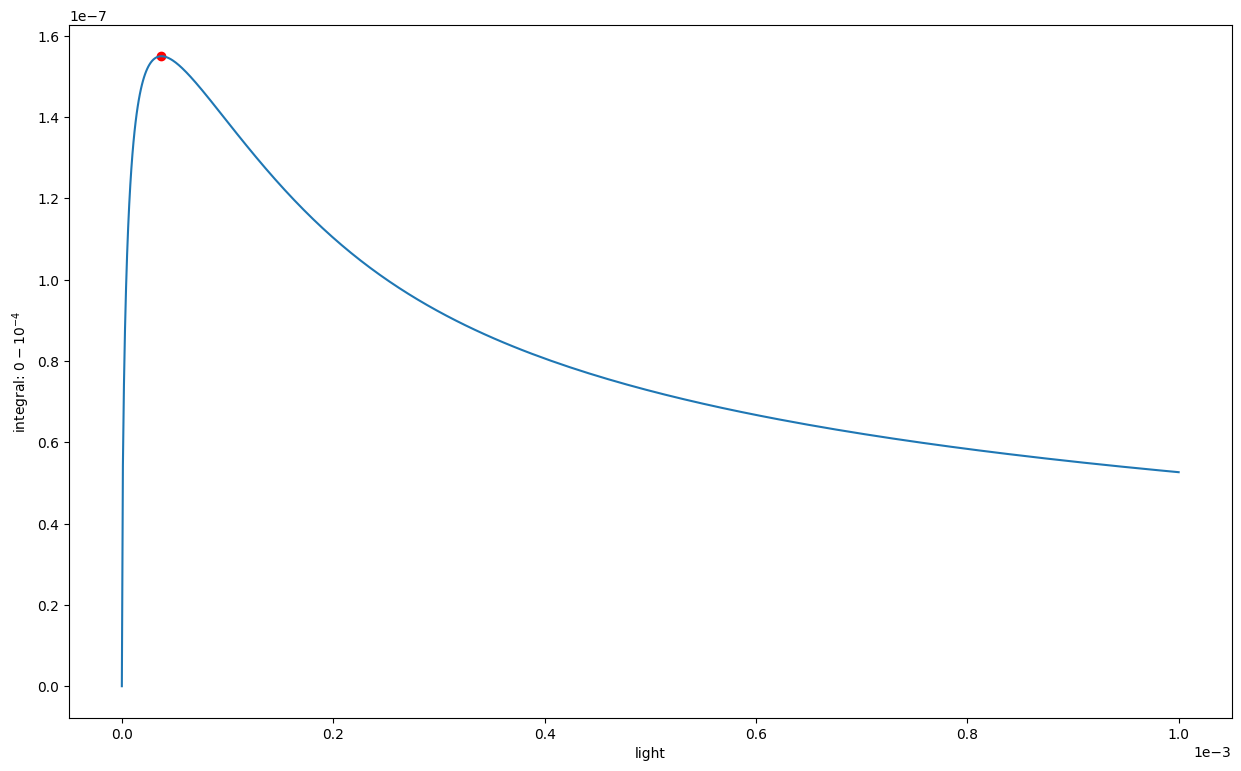

In [66]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(
    df_show['light'],
    df_show['target'],
)
ax.set_xlabel('light')
ax.set_ylabel('integral: $0 - 10^{-4}$')
df_max = df_show[df_show['target'] == df_show['target'].max()]
ax.scatter(
    df_max['light'],
    df_max['target'],
    c='r',
)
max_value = df_max['target'].iloc[0]
max_light = df_max['light'].iloc[0]
print(f'Max value = {max_value:.2E}\nLight     = {max_light:.2E}')
scal_form = ScalarFormatter(1)
scal_form.set_powerlimits((0, 0.1))
ax.xaxis.set_major_formatter(scal_form)